In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import random
from sklearn.model_selection import KFold
import matplotlib.pyplot  as plt
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report

In [18]:
data=pd.read_csv('Final.csv',index_col=0)
data=data.drop(['WIND_SPEED', 'RAIN', 'SNOW', 'SNOW_DEPTH', 'TAVG', 'FOG', 'HEAVY_FOG',
       'THUNDER', 'HAIL', 'GLAZE', 'HAZE', 'BLOWING_SNOW','HOLIDAY'],axis=1)
data.columns

Index(['Y', '9E', 'AA', 'AS', 'B6', 'DL', 'EV', 'HA', 'MQ', 'OH', 'OO', 'UA',
       'US', 'VX', 'YX', 'h0', 'h1', 'h2', 'h3', 'h4', 'h5', 'h6', 'h7', 'h8',
       'h9', 'h10', 'h11', 'h12', 'h13', 'h14', 'h15', 'h16', 'h17', 'h18',
       'h19', 'h20', 'h21', 'h22', 'h23', 'JAN', 'FEB', 'MAR', 'APR', 'MAY',
       'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'],
      dtype='object')

In [19]:
random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(data.drop('Y',axis=1), data['Y'], test_size=0.25)

In [20]:
from sklearn import metrics
lr=LogisticRegression().fit(X_train,y_train)
fpr_lr, tpr_lr, thresholds_lr = metrics.roc_curve(y_test, lr.predict_proba(X_test)[:,1])
lr_auc=roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(0, 0.5, 'TP rate')

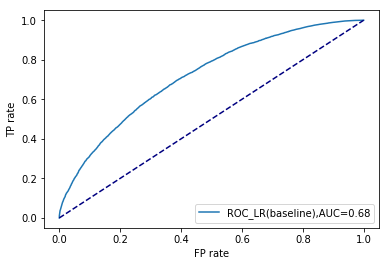

In [30]:
fig = plt.figure(figsize = (6, 4))
ax = fig.add_subplot(111)
plt.plot( fpr_lr,tpr_lr, label='ROC_LR(baseline),AUC={}'.format(0.68))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.legend(loc = 4)
ax.set_xlabel('FP rate')
ax.set_ylabel('TP rate')

In [24]:
cm=confusion_matrix(y_test,lr.predict(X_test))
prec=cm[1][1]/(cm[0][1]+cm[1][1])
recall=cm[1][1]/(cm[1][0]+cm[1][1])
f=2*prec*recall/(prec+recall)
print ('FP Rate:{}'.format(cm[0][1]/(cm[0][1]+cm[0][0])))
print ('Precision:{}'.format(prec))
print ('Recall:{}'.format(recall))
print ('FN rate:{}'.format(cm[1][0]/(cm[1][0]+cm[0][0])))
print ('Accuracy:{}'.format(lr.score(X_test,y_test)))
print ('F-Score:{}'.format(f))

FP Rate:0.009009009009009009
Precision:0.6482412060301508
Recall:0.07007354170148755
FN rate:0.18188876629479792
Accuracy:0.8145939716028238
F-Score:0.12647535729099893


In [17]:
y_test[y_test==0].count()/y_test.shape[0]

0.8096076579532904

In [28]:
target=['0','1']
print (classification_report(y_test,lr.predict(X_test), target_names=target))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90    101010
           1       0.65      0.07      0.13     23932

   micro avg       0.81      0.81      0.81    124942
   macro avg       0.73      0.53      0.51    124942
weighted avg       0.79      0.81      0.75    124942

